# SKA Work Experience

[![Binder](https://img.shields.io/badge/launch-SKA%20Work%20Experience-579ACA.svg?logo=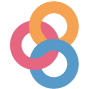)](https://k8s.stfc.skao.int/binderhub-outreach/v2/gl/ska-telescope%2Fradio-astro-tutorials/HEAD?labpath=outreach%2Fwork_experience.ipynb) 

In [11]:
# Previous Notes
# Link: https://colab.research.google.com/drive/1TXAyfJEykGv9pFlhL1xp9HsxN8mm57jo?authuser=1#scrollTo=BdHh6BLjFhud 
# Docs: https://docs.google.com/document/d/1zVkrfbcjlK3kgXYH4MUQTgGEUHkikv7_5pDYdW4ukX0/edit 
# Introduction
# This notebook is designed for a work experience event for children aged 14-19
# with a focus on coding and the SKA Observatory. The aim is to have fun while
# learning about radio astronomy and basic programming concepts.

# TODO List
# - Get the first exercise working on text #2: Ugur
# - Get the dish image working #3: Gemma
# - Tie the image to #2
# - Array of dishes enabler #6: Sam
# - Array of dishes:
# - Tie all of it together
# - Polish
# - Testing


# Meeting Notes

# Try to make it accessible
# Tooltips and visual feedback for each stage to eliminate confusion
# Try to have a reset button so that mistakes are easy to fix
#


# 9. Conclusion and Discussion
# Recap what students have learned
# Discuss real-world applications of these concepts in SKA Observatory
# Encourage further exploration in astronomy and coding

# Additional helper functions or setup code can be added as needed

# Remember to test all functions and provide clear instructions for students
# throughout the notebook. Add markdown cells between code cells to explain
# concepts and provide guidance.

## TODOs

### General

- [ ] clean up comments and add a general HEADER about SKAO, what notebook is, how to interact with it etc. etc.
- [ ] change the layout so that plots and controls are looking nicer (bigger, on the side, themed etc.?)
- [ ] get the functions hidden?
- [ ] get the print lines as markdown

### First Exercise

- [x] get it working
- [ ] crop the image so that sky looks nice
- [ ] get the antenna image as a separate image below and tie it to the controllers (or change to something else) so that it moves with controls
- [ ] write lots of documentation
- [ ] Add a section (a new cell) for people to write code instead of interacting (something still abstracted like: lookLeft, lookRight, lookUp, lookDown, biggerDish, higherFrequency etc. functions as wrappers
- [ ] add some tests
- [ ] add an optional challenge for people to follow up on

### Second Exercise

- [x] get it working
- [ ] change the UV map so that antennas are looking nicer
- [ ] change the image to galaxy image
- [ ] change the parameters so that score is easier and you can achieve >90 which gives a very good image quality
- [ ] write lots of documentation
- [ ] Add a section (a new cell) for people to write code instead of interacting (something still abstracted like: lookLeft, lookRight, lookUp, lookDown, biggerDish, higherFrequency etc. functions as wrappers
- [ ] add some tests
- [ ] add an optional challenge for people to follow up on

## Dependencies

In [12]:
# %pip install ipywidgets numpy matplotlib scipy

# Can also run only the notebook with voila?
# Install all and run locally or in the binderhub from this repository:
# Link: https://k8s.stfc.skao.int/binderhub/v2/gl/ska-telescope%2Fradio-astro-tutorials/HEAD?labpath=outreach%2Fwork_experience.ipynb

.: Error encountered while sourcing file ''/Applications/Visual Studio Code.app/Contents/Resources/app/out/vs/workbench/contrib/terminal/common/scripts/fish_xdg_data/fish/vendor_conf.d/shellIntegration.fishcd'':
.: No such file or directory
Note: you may need to restart the kernel to use updated packages.


## First Exercise

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy import special as sp
from matplotlib.colors import LinearSegmentedColormap

# Load a sky image (you'll need to replace this with an actual image path)
sky_image = plt.imread('MeerKAT_astro_3_sarel_photowise-1024x399.jpg')

# Create a simple night sky background
# sky_image = np.zeros((200, 200, 3))
# sky_image[:,:,2] = np.linspace(0, 0.3, 200)  # Add a bit of blue for a night sky effect

# Choose a random star location
star_location = np.random.randint(20, 180, 2)  # Adjusted range to avoid edges

def simulate_radio_dish(diameter, frequency, pointing):
    """Simulate a radio dish's reception pattern with visible side lobes."""
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)
    
    # Adjust X and Y based on pointing
    X = X - pointing[0]
    Y = Y - pointing[1]
    
    r = np.sqrt(X**2 + Y**2)
    
    # Beam width affected by dish size and frequency (smaller value = narrower beam)
    beam_width = 2 / (diameter * frequency / 1e9)
    pattern = np.exp(-(r**2) / (2 * beam_width**2))
    
    # Add more prominent side lobes
    for i in range(1, 4):
        side_lobe_distance = beam_width * (2.5 + i * 1.5)
        side_lobe_strength = 0.2 / i
        pattern += side_lobe_strength * np.exp(-((r - side_lobe_distance)**2) / (2 * (beam_width/2)**2))
    
    # Normalize pattern
    pattern = pattern / np.max(pattern)
    
    return pattern

def plot_dish_and_star(diameter, frequency, azimuth, elevation):
    pointing = [azimuth, elevation]
    pattern = simulate_radio_dish(diameter, frequency, pointing)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Custom colormap for the radio beam
    colors = [(0,0,0,0), '#0000FF', '#00FFFF', '#FFFF00', '#FF0000', '#FF00FF']
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)
    
    # Plot 1: Radio Dish Reception Pattern
    ax1.imshow(sky_image, extent=[-10, 10, -10, 10])
    im1 = ax1.imshow(pattern, cmap=cmap, extent=[-10, 10, -10, 10], vmin=0.1, vmax=1, origin='lower', alpha=0.7)
    plt.colorbar(im1, ax=ax1, label='Signal Strength')
    ax1.set_title(f'Dish Size: {diameter}m, Frequency: {frequency:.2e}Hz', fontsize=14)
    ax1.set_xlabel('Azimuth', fontsize=12)
    ax1.set_ylabel('Elevation', fontsize=12)
    
    # Plot 2: Find the Star
    ax2.imshow(sky_image, extent=[-10, 10, -10, 10])
    im2 = ax2.imshow(pattern, cmap=cmap, extent=[-10, 10, -10, 10], vmin=0.1, vmax=1, origin='lower', alpha=0.7)
    plt.colorbar(im2, ax=ax2, label='Signal Strength')
    ax2.scatter(star_location[0]/10 - 10, star_location[1]/10 - 10, color='white', s=100, marker='*', edgecolor='black')
    ax2.set_title('Find the Star!', fontsize=14)
    ax2.set_xlabel('Azimuth', fontsize=12)
    ax2.set_ylabel('Elevation', fontsize=12)
    
    # Ensure both plots have the same axis limits
    for ax in [ax1, ax2]:
        ax.set_xlim(-10, 10)
        ax.set_ylim(-10, 10)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate distance to star and signal strength
    star_az = star_location[0]/10 - 10
    star_el = star_location[1]/10 - 10
    distance = np.sqrt((azimuth - star_az)**2 + (elevation - star_el)**2)
    signal_strength = pattern[star_location[1], star_location[0]]
    
    detection_threshold = 0.1
    
    if signal_strength > detection_threshold:
        print(f"Signal detected! Strength: {signal_strength:.2f}")
        if distance < 0.5:
            print("Congratulations! You've precisely located the star!")
        elif distance < 1:
            print("You're very close! Fine-tune your pointing to pinpoint the star.")
        else:
            print("You've detected the star, but your beam is too wide. Try increasing dish size or frequency for better precision.")
    else:
        print(f"No significant signal detected. Try scanning a wider area. Current signal strength: {signal_strength:.2f}")

    print(f"Current Azimuth: {azimuth:.1f} - Star: {star_az:.1f}")
    print(f"Current Elevation: {elevation:.1f} - Star: {star_el:.1f}")

# Create interactive widget
interact(plot_dish_and_star, 
         diameter=widgets.FloatSlider(min=10, max=100, step=5, value=50, description='Dish Size (m)', style={'description_width': 'initial'}),
         frequency=widgets.FloatLogSlider(min=8, max=11, step=0.1, value=9, description='Frequency (Hz)', style={'description_width': 'initial'}),
         azimuth=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0, description='Azimuth', style={'description_width': 'initial'}),
         elevation=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0, description='Elevation', style={'description_width': 'initial'}))

print("Welcome to the SKA Observatory Radio Telescope Simulator!")
print("\nYour mission: Find a star in the night sky using your radio telescope!")
print("\nHow each control works:")
print("\n1. Dish Size: Bigger dish = stronger signal and narrower beam. Great for precise locations, but harder to find objects initially.")
print("2. Frequency: Higher frequency = narrower beam. Helps pinpoint locations but makes initial detection trickier.")
print("3. Azimuth: Horizontal angle. Think of it as looking left or right.")
print("4. Elevation: Vertical angle. Think of it as looking up or down.")
print("\nTips for success:")
print("1. Start with a smaller dish and lower frequency to scan a wide area.")
print("2. Move your telescope around using azimuth and elevation to search for the star.")
print("3. When you detect a signal, increase dish size and frequency to pinpoint the exact location.")
print("4. Watch out for the side lobes (smaller bright spots around the main beam) - they might trick you!")
print("\nGood luck, and happy star-hunting!")

interactive(children=(FloatSlider(value=50.0, description='Dish Size (m)', min=10.0, step=5.0, style=SliderSty…

Welcome to the SKA Observatory Radio Telescope Simulator!

Your mission: Find a star in the night sky using your radio telescope!

How each control works:

1. Dish Size: Bigger dish = stronger signal and narrower beam. Great for precise locations, but harder to find objects initially.
2. Frequency: Higher frequency = narrower beam. Helps pinpoint locations but makes initial detection trickier.
3. Azimuth: Horizontal angle. Think of it as looking left or right.
4. Elevation: Vertical angle. Think of it as looking up or down.

Tips for success:
1. Start with a smaller dish and lower frequency to scan a wide area.
2. Move your telescope around using azimuth and elevation to search for the star.
3. When you detect a signal, increase dish size and frequency to pinpoint the exact location.
4. Watch out for the side lobes (smaller bright spots around the main beam) - they might trick you!

Good luck, and happy star-hunting!


## Second Exercise

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.ndimage import gaussian_filter

# Create a simple night sky background
sky_image = np.zeros((200, 200, 3))
sky_image[:,:,2] = np.linspace(0, 0.3, 200)  # Add a bit of blue for a night sky effect

def create_galaxy_image(size=200):
    """Create a simple model of a spiral galaxy."""
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    
    # Create spiral arms
    r = np.sqrt(X**2 + Y**2)
    theta = np.arctan2(Y, X)
    spiral = np.sin(5*theta + 5*r) * np.exp(-r**2/0.5)
    
    # Add central bulge
    bulge = np.exp(-(X**2 + Y**2)/0.1)
    
    galaxy = spiral + bulge
    galaxy = galaxy / np.max(galaxy)  # Normalize
    
    return galaxy

# Create our model galaxy
true_galaxy = create_galaxy_image()

def generate_array_config(config_type, num_antennas, max_baseline):
    """Generate array configuration based on type, number of antennas, and max baseline."""
    if config_type == 'Compact':
        side_length = int(np.ceil(np.sqrt(num_antennas)))
        x = np.linspace(-max_baseline/2, max_baseline/2, side_length)
        y = np.linspace(-max_baseline/2, max_baseline/2, side_length)
        xx, yy = np.meshgrid(x, y)
        coords = list(zip(xx.ravel(), yy.ravel()))
        return coords[:num_antennas]
    elif config_type == 'Y-shaped':
        arm_length = max_baseline / 2
        antennas_per_arm = num_antennas // 3
        coords = [(0, 0)]  # Center antenna
        for angle in [0, 2*np.pi/3, 4*np.pi/3]:
            arm_coords = [(arm_length * i / antennas_per_arm * np.cos(angle),
                           arm_length * i / antennas_per_arm * np.sin(angle))
                          for i in range(1, antennas_per_arm + 1)]
            coords.extend(arm_coords)
        return coords[:num_antennas]
    elif config_type == 'Circular':
        angles = np.linspace(0, 2*np.pi, num_antennas, endpoint=False)
        return [(max_baseline/2 * np.cos(angle), max_baseline/2 * np.sin(angle)) for angle in angles]
    elif config_type == 'Spiral':
        angles = np.linspace(0, 6*np.pi, num_antennas)
        radii = np.linspace(0, max_baseline/2, num_antennas)
        return [(r * np.cos(angle), r * np.sin(angle)) for r, angle in zip(radii, angles)]
    elif config_type == 'Random':
        return [(np.random.uniform(-max_baseline/2, max_baseline/2),
                 np.random.uniform(-max_baseline/2, max_baseline/2))
                for _ in range(num_antennas)]

def calculate_uv_coverage(array_config, num_samples=100):
    """Calculate UV coverage based on array configuration."""
    uv_points = []
    for i in range(len(array_config)):
        for j in range(i+1, len(array_config)):
            dx = array_config[j][0] - array_config[i][0]
            dy = array_config[j][1] - array_config[i][1]
            for t in np.linspace(0, 2*np.pi, num_samples):
                u = dx * np.cos(t) - dy * np.sin(t)
                v = dx * np.sin(t) + dy * np.cos(t)
                uv_points.append((u, v))
                uv_points.append((-u, -v))  # Add conjugate point
    return np.array(uv_points)

def simulate_observation(array_config, obs_time):
    """Simulate an interferometric observation of the galaxy."""
    num_antennas = len(array_config)
    max_baseline = np.max([np.sqrt(x**2 + y**2) for x, y in array_config])
    
    # Calculate UV coverage
    uv_coverage = calculate_uv_coverage(array_config)
    
    # Calculate resolution based on max baseline and UV coverage
    resolution = 200 / (max_baseline / 10)  # Base resolution
    uv_density = len(uv_coverage) / (np.pi * max_baseline**2)  # Normalized UV density
    effective_resolution = resolution / np.sqrt(uv_density)  # Adjust resolution based on UV density
    
    # Apply Gaussian blur to simulate limited resolution
    blurred_galaxy = gaussian_filter(true_galaxy, sigma=effective_resolution)
    
    # Simulate noise
    noise_level = 1 / (num_antennas * np.sqrt(obs_time))
    noise = np.random.normal(0, noise_level, true_galaxy.shape)
    
    # Combine blurred image with noise
    observed_galaxy = blurred_galaxy + noise
    
    # Clip values to be between 0 and 1
    observed_galaxy = np.clip(observed_galaxy, 0, 1)
    
    return observed_galaxy, uv_coverage

def calculate_score(num_antennas, max_baseline, obs_time, uv_coverage):
    """Calculate a score based on the observation parameters and results."""
    resolution_score = np.log(max_baseline) / np.log(1000)  # Normalize to 0-1 range
    sensitivity_score = np.log(num_antennas * np.sqrt(obs_time)) / np.log(50 * np.sqrt(24))  # Normalize to 0-1 range
    uv_density_score = len(uv_coverage) / (num_antennas * (num_antennas - 1) * 100)  # Normalize based on max possible UV points
    
    # Combine scores with weights
    total_score = (0.4 * resolution_score + 0.3 * sensitivity_score + 0.3 * uv_density_score) * 100
    
    return np.clip(total_score, 0, 100)  # Ensure score is between 0 and 100

def plot_interferometer(config_choice, num_antennas, max_baseline, obs_time):
    array_config = generate_array_config(config_type=config_choice, num_antennas=num_antennas, max_baseline=max_baseline)
    observed_galaxy, uv_coverage = simulate_observation(array_config, obs_time)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    
    # Plot 1: True Galaxy Image
    ax1.imshow(sky_image)
    ax1.imshow(true_galaxy, cmap='hot', alpha=0.7)
    ax1.set_title('Actual Galaxy', fontsize=14)
    ax1.axis('off')
    
    # Plot 2: Observed Galaxy Image
    ax2.imshow(sky_image)
    im2 = ax2.imshow(observed_galaxy, cmap='hot', alpha=0.7)
    plt.colorbar(im2, ax=ax2, label='Intensity')
    ax2.set_title(f'Observed Galaxy\n{config_choice} config, {num_antennas} antennas\n{max_baseline}m max baseline, {obs_time:.1f}h', fontsize=12)
    ax2.axis('off')
    
    # Plot 3: Array Configuration and UV Coverage
    max_uv = 1000  # Fixed maximum UV distance to show
    ax3.scatter(*zip(*array_config), c='red', s=50, label='Antennas')
    ax3.scatter(*zip(*uv_coverage), s=1, alpha=0.1, c='blue', label='UV Coverage')
    ax3.set_xlim(-max_uv, max_uv)
    ax3.set_ylim(-max_uv, max_uv)
    ax3.set_aspect('equal')
    ax3.legend()
    ax3.set_title('Array Config and UV Coverage', fontsize=14)
    ax3.set_xlabel('U (m)', fontsize=10)
    ax3.set_ylabel('V (m)', fontsize=10)
    
    # Add scale indicator
    ax3.plot([-900, -700], [-900, -900], 'k-', lw=2)
    ax3.text(-800, -850, '200 m', fontsize=10, ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display score
    score = calculate_score(num_antennas, max_baseline, obs_time, uv_coverage)
    print(f"Observation Score: {score:.2f}")
    
    if score > 80:
        print("Excellent observation! You've captured fine details of the galaxy structure.")
    elif score > 60:
        print("Good job! You can see the overall structure, but some fine details are still unclear.")
    else:
        print("Keep improving! Try adjusting the array configuration, number of antennas, or observe longer for better results.")

# Create interactive widget
interact(plot_interferometer, 
         config_choice=widgets.Dropdown(
             options=['Compact', 'Y-shaped', 'Circular', 'Spiral', 'Random'],
             value='Compact',
             description='Array Config:',
             style={'description_width': 'initial'}
         ),
         num_antennas=widgets.IntSlider(min=3, max=50, step=1, value=10, description='Number of Antennas:', style={'description_width': 'initial'}),
         max_baseline=widgets.FloatSlider(min=100, max=1000, step=50, value=500, description='Max Baseline (m):', style={'description_width': 'initial'}),
         obs_time=widgets.FloatSlider(min=1, max=24, step=0.5, value=6, description='Observation Time (hours):', style={'description_width': 'initial'}))

print("Welcome to the Advanced SKA Observatory Interferometry Simulator!")
print("\nYour mission: Optimize the array configuration to best resolve a distant galaxy!")
print("\nHow it works:")
print("1. Array Configuration: Choose from different antenna layouts, including the Spiral option.")
print("2. Number of Antennas: More antennas generally improve sensitivity and UV coverage.")
print("3. Maximum Baseline: Longer baselines improve resolution. Watch how this affects the UV coverage plot!")
print("4. Observation Time: Longer observations reduce noise and reveal fainter structures.")
print("\nWhat to observe:")
print("- Compare how different configurations and parameters affect image quality and UV coverage.")
print("- Notice how changing the maximum baseline affects the spread of points in the UV coverage plot.")
print("- Try to find the best balance between resolution (spread of UV points) and sensitivity (number of UV points).")
print("- The UV coverage plot now has a fixed scale, making it easier to compare different configurations!")
print("\nChallenge: Can you achieve a score above 80? Good luck, and enjoy exploring advanced interferometry concepts!")

interactive(children=(Dropdown(description='Array Config:', options=('Compact', 'Y-shaped', 'Circular', 'Spira…

Welcome to the Advanced SKA Observatory Interferometry Simulator!

Your mission: Optimize the array configuration to best resolve a distant galaxy!

How it works:
1. Array Configuration: Choose from different antenna layouts, including the Spiral option.
2. Number of Antennas: More antennas generally improve sensitivity and UV coverage.
3. Maximum Baseline: Longer baselines improve resolution. Watch how this affects the UV coverage plot!
4. Observation Time: Longer observations reduce noise and reveal fainter structures.

What to observe:
- Compare how different configurations and parameters affect image quality and UV coverage.
- Notice how changing the maximum baseline affects the spread of points in the UV coverage plot.
- Try to find the best balance between resolution (spread of UV points) and sensitivity (number of UV points).
- The UV coverage plot now has a fixed scale, making it easier to compare different configurations!

Challenge: Can you achieve a score above 80? Good luck